<a href="https://colab.research.google.com/github/YusolCho/NLPstudy/blob/main/NLP_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 데이터 및 패키지 불러오기**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
filename = '/content/drive/MyDrive/practice.csv'

In [ ]:
import csv

In [ ]:
data = pd.read_csv(filename,delimiter=',')
data.head()

,index,text,score
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3


# **2. 데이터 EDA**

In [ ]:
temp = data.score.unique() # 라벨의 고유값 확인
np.sort(temp)

array([0, 1, 2, 3, 4])

* 데이터를 살펴보니 text에서 영어로 된 문자열이 주를 이루며, 각 text는 0~4까지 5가지로 그룹이 라벨링 되어있다.



## **(1)결측치 확인**

In [ ]:
# 결측치 존재 여부를 확인해주는 함수
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않음')
    return missing_col

missing_col = check_missing_col(data)


결측치가 존재하지 않음


## **(2)기초 통계 분석**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54879 entries, 0 to 54878
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   54879 non-null  int64 
 1   text    54879 non-null  object
 2   score   54879 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


info() 함수를 이용해 간단하게 살펴보기

고유번호인 'index'는 인덱스(데이터의 위치를 포함하는 자료 구조)이기 때문에 분석을 할 때는 데이터의 위치를 필요로 하지 않음.

object형 'text'와, int형 'score' 총 두 개의 컬럼으로 구성됨.

내용에 해당하는 'text' 변수를 집중적으로 살펴볼 것 

## **(3)Text 기초 전처리**

In [ ]:
data.text

0        he was almost choking there was so much so muc...
1                       your sister asked for it i suppose
2        she was engaged one day as she walked in perus...
3        the captain was in the porch keeping himself c...
4        have mercy gentlemen odin flung up his hands d...
                               ...                        
54874    is that you mr smith odin whispered i hardly d...
54875    i told my plan to the captain and between us w...
54876    your sincere wellwisher friend and sister lucy...
54877                 then you wanted me to lend you money
54878    it certainly had not occurred to me before but...
Name: text, Length: 54879, dtype: object

불필요한 문자 존재 : \n, & 등 

정규표현식 이용해 이를 전처리 => 깔끔한 문장 만들기

In [ ]:
import re 

def clean_text(texts): 
  corpus = [] 
  for i in range(0, len(texts)): 

    review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
    review = re.sub(r'\d+','', review)#숫자 제거
    review = review.lower() #소문자 변환
    review = re.sub(r'\s+', ' ', review) #extra space 제거
    review = re.sub(r'<[^>]+>','',review) #Html tags 제거
    review = re.sub(r'\s+', ' ', review) #spaces 제거
    review = re.sub(r"^\s+", '', review) #space from start 제거
    review = re.sub(r'\s+$', '', review) #space from the end 제거
    review = re.sub(r'_', ' ', review) #space from the end 제거
    review = re.sub(r'"+', ' ', review) #spaces 제거
    review = re.sub('[^a-zA-Z]', ' ', review)    
    
    corpus.append(review) 
  
  return corpus

In [ ]:
temp = clean_text(data['text']) #메소드 적용
data['text'] = temp
data.head(20)
data.tail(20)


,index,text,score
54859,54859,odin looked at him in silence,3
54860,54860,certainly i will be so good gentlemen,3
54861,54861,her mind made up on these several points and h...,1
54862,54862,that s missis odin said mr odin,0
54863,54863,well if it was my house i should never sit any...,1
54864,54864,he appeared presently looking a little irritab...,1
54865,54865,i am going she said again in a gentler voice t...,0
54866,54866,we clambered up through the hole odin turned h...,2
54867,54867,my dear odin you are talking quite idly pray w...,1
54868,54868,the young gentleman smiled as if to intimate t...,0


* 문장의 시작과 끝에 위치한 " 를 제거하지 못하였음

* 일단 뒤에 코드 실행 후 다시 돌아와서 수습하기 => 수습 완료 

## **SCORE 그룹 비율 확인**

In [ ]:
val_count = data['score'].value_counts() # 유니크값의 개수를 확인

for i in range(0,5):
  print(f'라벨 {i}인 리뷰 개수:', val_count[i])

라벨 0인 리뷰 개수: 13235
라벨 1인 리뷰 개수: 7222
라벨 2인 리뷰 개수: 11554
라벨 3인 리뷰 개수: 15063
라벨 4인 리뷰 개수: 7805


# **데이터 시각화**

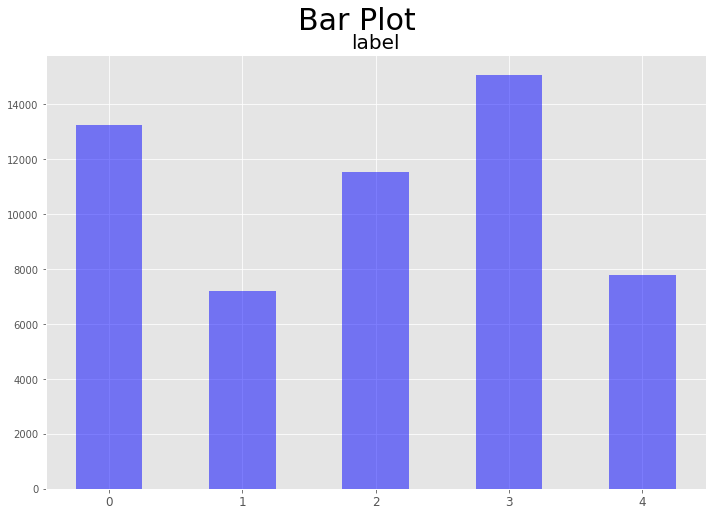

In [ ]:
%matplotlib inline
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴보기.
feature = data['score']
====
plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Bar Plot", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('label', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

* 총 54879개의 데이터에서 20가지 라벨이 모두 7000개가 넘고,

* 그중 1번 라벨이 가장 수가 적다

# **뉴스 text 길이 확인**

In [ ]:
str_len_mean = np.mean(data['text'].str.len()) # 리뷰 길이의 평균값 계산
print('글의 평균 길이 :',round(str_len_mean,0))

글의 평균 길이 : 218.0


## **글의 문자열 길이를 히스토그램으로 나타내기**

In [ ]:
# 데이터 필터링을 위한 마스크 설정
for i in range(0, 20):
  globals()['mask_{}'.format(i)] = (data.score == i)

# 전체 및 그룹 집합을 설정합니다.
df_data = data.text.copy() # 전체 train 데이터

for i in range(0, 20):
  globals()['df_{}'.format(i)] = data.loc[globals()['mask_{}'.format(i)],:].text # 20가지 라벨 각각에 해당하는 데이터를 df0~19로 할당

# 스무가지로 나뉜 집합을 리스트로 묶어줍니다.
compare = [df_0, df_1, df_2, df_3, df_4]

* 라벨별로 5가지로 나뉜 데이터프레임 중 0번째 라벨의 text 데이터를 살펴보기

In [ ]:
df_0

8              you were not here last sunday night he said
12       i had scant luggage to take with me to london ...
19       why the fact is returned odin mr odin had so c...
20       dora was delighted with the little presents an...
23       the kind tone of this answer the sweet voice t...
                               ...                        
54869                 you are afraid brittles said mr odin
54870             dont fear me i will be true to the death
54872    and the premium sir i returned is a thousand p...
54873    he looked back over his shoulder and beckoned ...
54878    it certainly had not occurred to me before but...
Name: text, Length: 13235, dtype: object

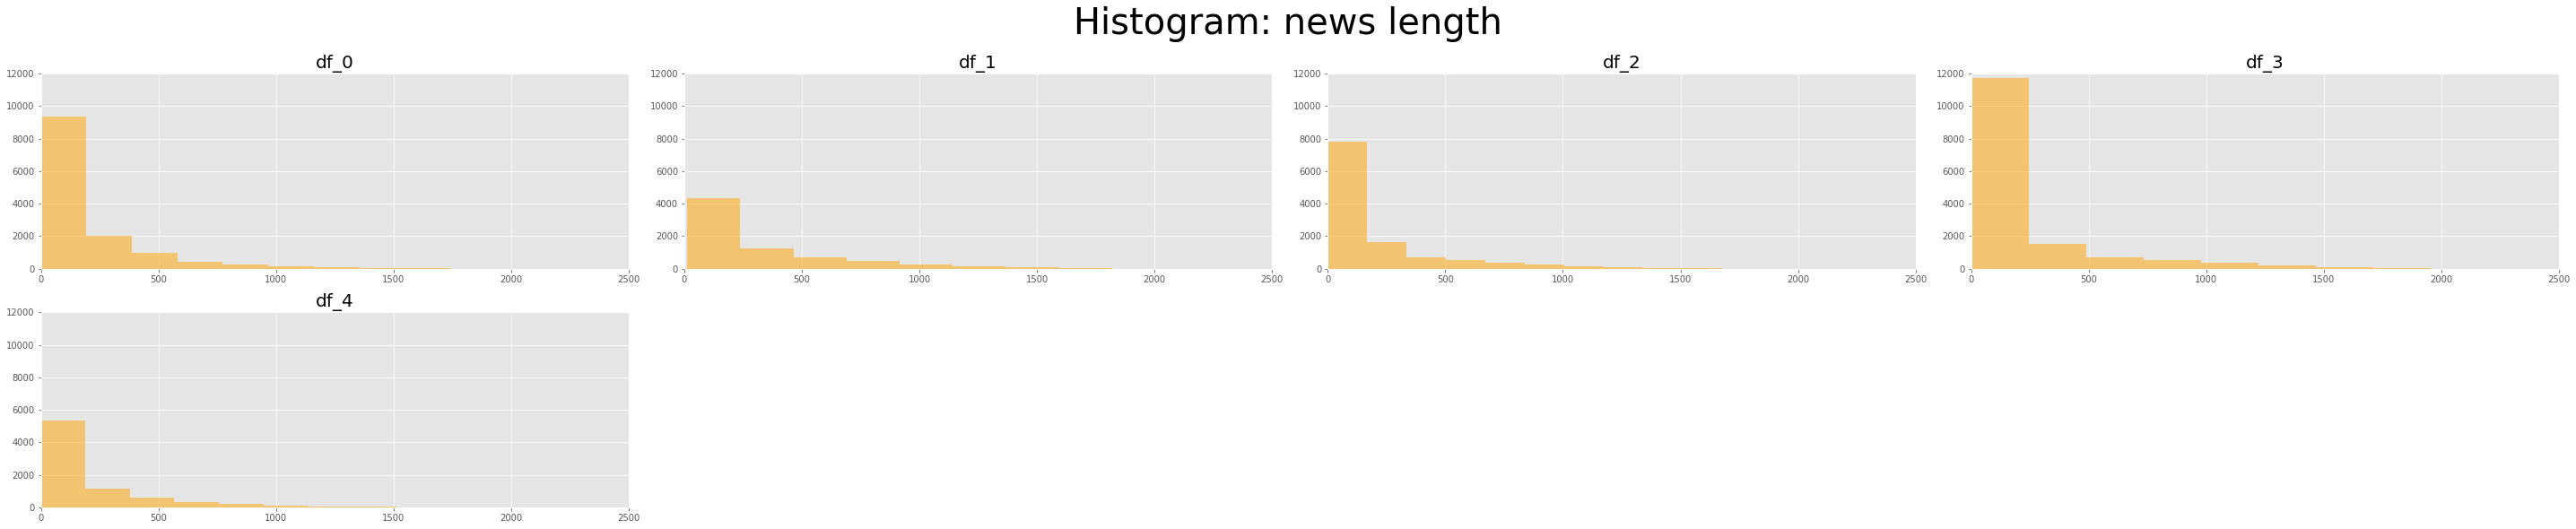

In [ ]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(40,20))
plt.suptitle("Histogram: news length", fontsize=40)
name = ['df_0', 'df_1', 'df_2', 'df_3', 'df_4'] # 제목으로 사용할 문자열 (라벨의 실제 이름)

for i in range(len(compare)):
    text = compare[i]
    string_len = [len(x) for x in text]    
    plt.subplot(5,4,i+1) # 행 개수/ 열 개수/ 해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([0, 2500, 0, 12000])  #x축 시작, 끝 / y축 시작, 끝
    plt.hist(string_len, alpha=0.5, color='orange') # 히스토그램 생성, alpha: 그래프의 투명도 조절
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


* 대체적으로 문자열 길이가 250 미만일 때의 빈도수가 많음

* 데이터 길이의 분포는 대체로 같음

# **워드 클라우드**

## **워드클라우드 패키지 불러오기**

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
import pickle
from nltk.corpus import stopwords
from os import path
nltk.download('all')

* 데이터프레임으로 들어있는 글들을 하나의 문자열로 만들기 위한 메소드를 정의.

In [ ]:
def df2str(df):
    
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document

## **워드토큰화**

* 워드클라우드를 만들기 위하여 텍스트를 토큰화. nltk의 word_tokenize 메소드를 이용.



In [ ]:
word_tokens = nltk.word_tokenize(df2str(data.text))

In [ ]:
word_tokens

In [ ]:
final_NN_words

## **품사 분리 POS tagging**

In [ ]:
# pos_tag()의 입력값으로는 단어의 리스트가 들어가야 한다.
tokens_pos = nltk.pos_tag(word_tokens)

## **명사만 추출하기**
* 명사는 NN을 포함하고 있으므로 NN이 들어있는 단어만을 추출

In [ ]:
# 명사는 NN을 포함하고 있음을 알 수 있음
NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)

## **품사 원형 찾기**
* 워드클라우드 단어의 빈도수를 정확히 축정하기 위하여 단어의 원형형태로 통일
* nltk에서 제공하는 WordNetLemmatizer() 메소드를 이용해 보겠습니다.

In [ ]:
# 명사의 경우 보통 복수 -> 단수 형태로 변형
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

## **불용어 처리**
* nltk에서 제공하는 불용어 기본 사전 이용하여 워드클라우드에 사용하지 않을 단어를 제거

In [ ]:
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

## **빈도분석**
* 빈도수 상위 10개의 단어를 출력

In [ ]:
from collections import Counter
c = Counter(final_NN_words)
k = 10

In [ ]:
c.most_common(k) # 빈도수 기준 상위 k개 단어 출력

[('’', 6121),
 ('odin', 4393),
 ('‘', 3645),
 ('“', 3266),
 ('”', 3128),
 ('mr', 1571),
 ('time', 1099),
 ('hand', 1066),
 ('man', 883),
 ('head', 701)]

* 그래프 시각화(빈도수 기준으로)

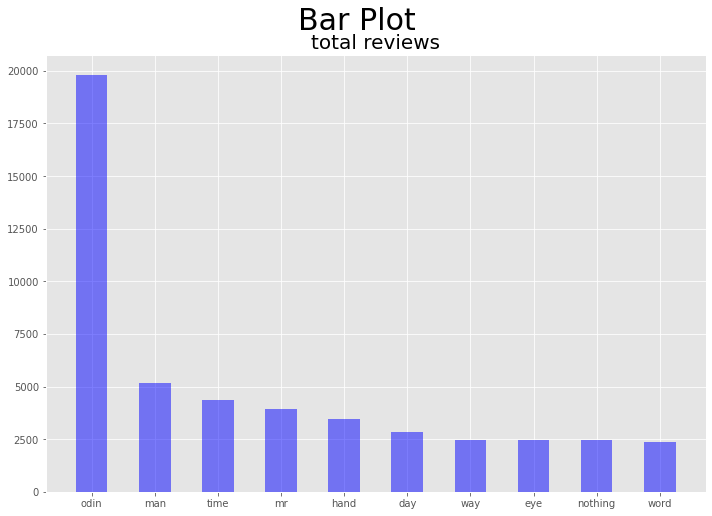

In [ ]:
top_10 = c.most_common(k) # 추출한 명사 중 상위 10개
keys = [top_10[i][0] for i in range(len(top_10))]
values = [top_10[i][1] for i in range(len(top_10))]

plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('total reviews', fontsize=20)
plt.bar(keys, values, width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## **워드클라우드**

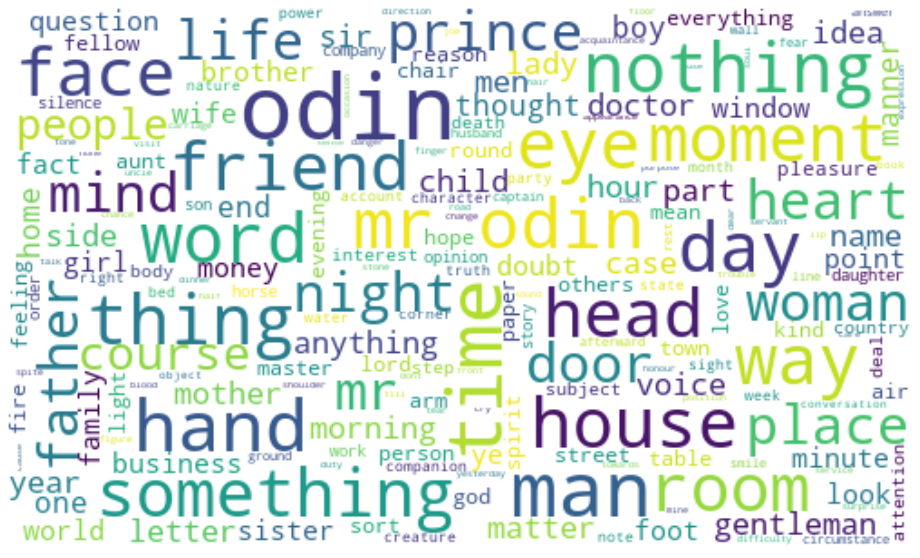

In [ ]:
noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=50, #가장 큰 폰트 크기 제한
                      width=500, #너비
                      height=300, #높이
                      background_color='white', #배경 색상
                      relative_scaling=.2 #상대적인 크기
                      ).generate(noun_text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
